<a href="https://colab.research.google.com/github/R-Ramana/EE4211-Project/blob/main/EE4211_Group_9_Question_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Proposal 

**We propose a multi-pronged approach wherein we will be tackling the given problem from the perspective of 2 different stakeholders: vehicle drivers and the Urban Redevelopment Authority (URA)/Land Transport Authority (LTA). Our approach allows us to analyse data in the short term as well as the long term.**

## Short-term analytics

Our recommendation system targets users aiming to plan their trips early. Such users will be required to provide their destination and estimated time of arrival (in terms of hours from now) and our system will provide them with the best available parking option based on distance from their destination and parking availability.

### ML Forecasting for carpark availability
 - Dynamic ML system that uses the following data depending on the month to predict hourly availability[1]:

     - Past 2 (exclude 2020 due to covid) years (October 2019, October 2021) for the same month (in our case, October)
     - Past 2 months (August and September 2022)
     - October 2022 data for testing purposes.
     
**[1] For the purpose of this project we will be predicting October 2022's data to allow us to test the usability/performance of the system.**

### Algorithm
        
 1. Filter out a list of open carparks based on arrival hour. 
 2. Calculate distance based on destination geo coordinates and coordinates of open carparks
 3. Partial Selection Sort according to distance (least to max) to store top 5 possible open carparks with least distance for that sample.
 3. Predict carpark availability for the top 5 chosen carparks with the given arrival hour using the ML model described above.
 4. Choose the most available carpark from the top 5 carparks based on distance.
     



<table>
  <tr>
    <th style="text-align:center;">Data Attribute</th>
    <th style="text-align:center;">Source</th>
    <th style="text-align:center;">Remarks</th>
  </tr>
  <tr>
    <td style="text-align:left;">Geo-coordinates of current/final destination</td>
    <td style="text-align:left;">User Input</td>
    <td style="text-align:left;">To provide best carpark recommendations based on estimated time of arrrival and carparks near destination</td>
  </tr>
  <tr>
    <td style="text-align:left;">Geo-coordinates of carparks</td>
    <td style="text-align:left;" rowspan="3"><a href"https://data.gov.sg/dataset/hdb-carpark-information">Carpark Info Dataset</a></td>
    <td style="text-align:left;">To recommend carparks based on distance from destination</td>
  </tr>
  <tr>
      <td style="text-align:left;">Cost of parking</td>
      <td style="text-align:left;">To recommend carparks based on cost</td>
      
  </tr>
  <tr>
      <td style="text-align:left;">Carpark opening hours</td>
      <td style="text-align:left;">To recommend carparks that are open during user's time of arrival</td>
      
  </tr>
  <tr>
      <td style="text-align:left;">Carpark availability</td>
      <td style="text-align:left;"><a href"https://data.gov.sg/dataset/carpark-availability">Carpark Availability Dataset</a></td>
      <td style="text-align:left;">To recommend carparks based on availability</td>
  <tr>
      <td colspan="3" style="text-align:center; font-size:12px; text-transform:uppercase;"><b>If time permits...</b></td>
      
      
  </tr>
  <tr>
      <td style="text-align:left;">Weather forecast</td>
      <td style="text-align:left;"><a href"https://www.programmableweb.com/api/nea-datasets">NEA Weather API</a></td>
      <td style="text-align:left;">To recommend carparks based on current weather conditions</td>
      
  </tr>
  <tr>
      <td style="text-align:left;">Traffic Conditions</td>
      <td style="text-align:left;"><a href"https://datamall.lta.gov.sg/content/datamall/en/dynamic-data.html">Estimated Travel Times API</td>
      <td style="text-align:left;">To improve our time-of-arrival estimation</td>
      
  </tr>

</table>


**If time permits, we intend on supplementing our current data sources with Real-time Traffic Data and Weather forecasting insights to improve our reccomendations.**

### Long-term analytics

#### From a urban developer/Singapore Land Transport Authority's point of view:

We believe long-term analysis of this data will be beneficial from an urban developer's perspective, specifically for the LTA and URA. By looking at the usage of carparks trends through historical data analysis, we can forecast the availability of carparks in the long-term. Developers can identify hotspots where there may often be high usage of car parks and thus an excellent location to build more lots or carparks to cater to the high demand. In contrast, this long-term analysis can also identify potential spots where space can be saved by reducing the number of lots or carparks that don't have high usage forecasted.

**If time permits, with the additional data on upcoming HDB developments, we can take in the geo-coordinates of existing carparks as well as carpark availability, to predict if more carparks need to be built around these upcoming HDB developments.**


### PROPOSAL FEEDBACK:


*   Very extensive range of dataset and data sources

#### Recommendations:
*   Long-term analytics can clearly use a machine learning model, whereas for the short-term
analytics, the “features” are clear, but the “labels” are not so clear. If the “labels” are made
clear in the final report, this would be an excellent problem and solution.
*   There is a higher potential for the short-term analytics proposal, but it is tougher as well. We
recommend that this group approaches us during the live consultation sessions if you want
to verify with us and provide us with more details so that we can help. Else, if the group
already has clearly defined “labels” in mind, then please execute it. 

*Q3.1 At this point, you understand the data quite well. Carry out the analysis you proposed
in your group project proposal. You should use the dataset given but you may also use
additional datasets to supplement your analysis, look at unaggregated data, etc. Please
be sure to justify why the analysis is useful and interesting in the context of a data science
project. Note that you are not limited to the initial proposal and are free to expand on it.*

In [164]:
import pandas as pd
import numpy as np

carpark_info = pd.read_csv("hdb-carpark-information.csv")
carpark_info

,car_park_no,address,x_coord,y_coord,car_park_type,type_of_parking_system,short_term_parking,free_parking,night_parking,car_park_decks,gantry_height,car_park_basement
0,ACB,BLK 270/271 ALBERT CENTRE BASEMENT CAR PARK,30314.7936,31490.4942,BASEMENT CAR PARK,ELECTRONIC PARKING,WHOLE DAY,NO,YES,1,1.80,Y
1,ACM,BLK 98A ALJUNIED CRESCENT,33758.4143,33695.5198,MULTI-STOREY CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,5,2.10,N
2,AH1,BLK 101 JALAN DUSUN,29257.7203,34500.3599,SURFACE CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,0,0.00,N
3,AK19,BLOCK 253 ANG MO KIO STREET 21,28185.4359,39012.6664,SURFACE CAR PARK,COUPON PARKING,7AM-7PM,NO,NO,0,0.00,N
4,AK31,BLK 302/348 ANG MO KIO ST 31,29482.0290,38684.1754,SURFACE CAR PARK,COUPON PARKING,NO,NO,NO,0,0.00,N
...,...,...,...,...,...,...,...,...,...,...,...,...
2177,Y77M,BLK 461 YISHUN AVENUE 6,29850.1522,45576.0125,MULTI-STOREY CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,10,2.15,N
2178,Y78M,BLK 468 YISHUN ST 43,30057.2209,45166.4820,MULTI-STOREY CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,4,2.15,N
2179,Y8,"BLK 731/746 YISHUN STREET 71,72/AVENUE 5",27772.9219,45686.2734,SURFACE CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,0,4.50,N
2180,Y82M,BLK 478 YISHUN ST 42,29935.5818,45679.7181,MULTI-STOREY CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,11,2.15,N


In [35]:
## Reference from: https://github.com/zkkmin/coordconvert/blob/master/coordConverter.py

import requests
import csv
from sys import argv
import sys

# If python version is 2.5, install simplejson module and modified the module path in sys.path.apped()
if sys.version_info[:2][1] > 5:
    import json
else:
    sys.path.append("C:\\Python25\\Lib\\site-packages\\simplejson-3.0.7-py2.5.egg")
    import simplejson as json


url = "http://tasks.arcgisonline.com/ArcGIS/rest/services/Geometry/GeometryServer/project?"
inSR = ""
outSR = ""
X = ""
Y = ""
       
inSR = "3414"
outSR = "4326"

lat = []
lon = []

carpark_info['lon'] = 0

for i in range(0, len(carpark_info)):
    X = carpark_info.iloc[i]["x_coord"]
    Y = carpark_info.iloc[i]["y_coord"]

    geometries = 'geometries=%7B"geometryType"%3A"esriGeometryPoint"%2C"geometries"%3A%5B%7B"x"%3A' + str(X) + '%2C"y"%3A' + str(Y) + '%7D%5D%7D&f=pjson'  
    fullurl = url + 'inSR=' + inSR + '&outSR=' +outSR + '&' + geometries

    r = requests.get(fullurl)
    contents = json.loads(r.text)

    latitude = contents['geometries'][0]['y']
    lat.append(latitude)
    longitude = contents['geometries'][0]['x']
    lon.append(longitude)

In [34]:
carpark_info['lat'] = lat
carpark_info['lon'] = lon

carpark_info

,car_park_no,address,x_coord,y_coord,car_park_type,type_of_parking_system,short_term_parking,free_parking,night_parking,car_park_decks,gantry_height,car_park_basement,lat,lon
0,ACB,BLK 270/271 ALBERT CENTRE BASEMENT CAR PARK,30314.7936,31490.4942,BASEMENT CAR PARK,ELECTRONIC PARKING,WHOLE DAY,NO,YES,1,1.80,Y,1.301063,103.854118
1,ACM,BLK 98A ALJUNIED CRESCENT,33758.4143,33695.5198,MULTI-STOREY CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,5,2.10,N,1.321004,103.885061
2,AH1,BLK 101 JALAN DUSUN,29257.7203,34500.3599,SURFACE CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,0,0.00,N,1.328283,103.844620
3,AK19,BLOCK 253 ANG MO KIO STREET 21,28185.4359,39012.6664,SURFACE CAR PARK,COUPON PARKING,7AM-7PM,NO,NO,0,0.00,N,1.369091,103.834985
4,AK31,BLK 302/348 ANG MO KIO ST 31,29482.0290,38684.1754,SURFACE CAR PARK,COUPON PARKING,NO,NO,NO,0,0.00,N,1.366120,103.846636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,Y77M,BLK 461 YISHUN AVENUE 6,29850.1522,45576.0125,MULTI-STOREY CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,10,2.15,N,1.428448,103.849944
2178,Y78M,BLK 468 YISHUN ST 43,30057.2209,45166.4820,MULTI-STOREY CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,4,2.15,N,1.424744,103.851805
2179,Y8,"BLK 731/746 YISHUN STREET 71,72/AVENUE 5",27772.9219,45686.2734,SURFACE CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,0,4.50,N,1.429445,103.831278
2180,Y82M,BLK 478 YISHUN ST 42,29935.5818,45679.7181,MULTI-STOREY CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,11,2.15,N,1.429386,103.850712


In [36]:
carpark_info.to_csv('carpark_info_latlon.csv', index=False)

In [12]:
carpark_info_latlon = pd.read_csv("carpark_info_latlon.csv")
carpark_info_latlon

,car_park_no,address,x_coord,y_coord,car_park_type,type_of_parking_system,short_term_parking,free_parking,night_parking,car_park_decks,gantry_height,car_park_basement,lat,lon
0,ACB,BLK 270/271 ALBERT CENTRE BASEMENT CAR PARK,30314.7936,31490.4942,BASEMENT CAR PARK,ELECTRONIC PARKING,WHOLE DAY,NO,YES,1,1.80,Y,1.301063,103.854118
1,ACM,BLK 98A ALJUNIED CRESCENT,33758.4143,33695.5198,MULTI-STOREY CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,5,2.10,N,1.321004,103.885061
2,AH1,BLK 101 JALAN DUSUN,29257.7203,34500.3599,SURFACE CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,0,0.00,N,1.328283,103.844620
3,AK19,BLOCK 253 ANG MO KIO STREET 21,28185.4359,39012.6664,SURFACE CAR PARK,COUPON PARKING,7AM-7PM,NO,NO,0,0.00,N,1.369091,103.834985
4,AK31,BLK 302/348 ANG MO KIO ST 31,29482.0290,38684.1754,SURFACE CAR PARK,COUPON PARKING,NO,NO,NO,0,0.00,N,1.366120,103.846636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,Y77M,BLK 461 YISHUN AVENUE 6,29850.1522,45576.0125,MULTI-STOREY CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,10,2.15,N,1.428448,103.849944
2178,Y78M,BLK 468 YISHUN ST 43,30057.2209,45166.4820,MULTI-STOREY CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,4,2.15,N,1.424744,103.851805
2179,Y8,"BLK 731/746 YISHUN STREET 71,72/AVENUE 5",27772.9219,45686.2734,SURFACE CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,0,4.50,N,1.429445,103.831278
2180,Y82M,BLK 478 YISHUN ST 42,29935.5818,45679.7181,MULTI-STOREY CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,11,2.15,N,1.429386,103.850712


In [38]:
carpark_info_latlon.groupby(['short_term_parking']).groups.keys()

dict_keys(['7AM-10.30PM', '7AM-7PM', 'NO', 'WHOLE DAY'])

In [ ]:
## Calculating distance based on geo-coordinates


## ML Models - Data Combining

In [84]:
import os
import pandas as pd
import numpy as np
import io

subject_folders = os.listdir("data")
combined_data = pd.DataFrame()
for i in subject_folders:
    file = "data/" + i
    print("combining ", i)
    data = pd.read_csv(file)
    combined_data = combined_data.append(data)
    print(len(combined_data))
combined_data

combining  aug22_data_cleaned.csv
4075955
combining  oct19_data_cleaned.csv
8107175
combining  oct21_data_cleaned.csv
10783722
combining  sep22_data_cleaned.csv
14699808


,carpark_number,update_datetime,total_lots,lot_type,lots_available,minute,date,hour,day,percent_lots_available
0,HE12,2022-08-01 00:02:39,105,C,67,2,2022-08-01,0,1,63.809524
1,HLM,2022-08-01 00:03:03,583,C,501,3,2022-08-01,0,1,85.934820
2,RHM,2022-08-01 00:02:39,329,C,123,2,2022-08-01,0,1,37.386018
3,BM29,2022-08-01 00:02:49,97,C,84,2,2022-08-01,0,1,86.597938
4,Q81,2022-08-01 00:03:00,96,C,77,3,2022-08-01,0,1,80.208333
...,...,...,...,...,...,...,...,...,...,...
3916081,B65L,2022-09-30 23:39:41,5,C,0,39,2022-09-30,23,30,0.000000
3916082,BE3,2022-09-30 23:39:03,306,C,65,39,2022-09-30,23,30,21.241830
3916083,BE3R,2022-09-30 23:39:03,195,C,82,39,2022-09-30,23,30,42.051282
3916084,B8B,2022-09-30 23:39:18,249,C,131,39,2022-09-30,23,30,52.610442


In [85]:
test_data = pd.read_csv("testdata/oct2022_data_cleaned.csv")
test_data

,carpark_number,update_datetime,total_lots,lot_type,lots_available,minute,date,hour,day,percent_lots_available
0,A12,2022-10-01 00:00:11,205,C,105,0,2022-10-01,0,1,51.219512
1,BE39,2022-10-01 00:00:16,707,C,182,0,2022-10-01,0,1,25.742574
2,SE34,2022-10-01 00:00:12,270,C,48,0,2022-10-01,0,1,17.777778
3,A11,2022-10-01 00:00:06,368,C,137,0,2022-10-01,0,1,37.228261
4,Y56,2022-10-01 00:00:04,45,C,15,0,2022-10-01,0,1,33.333333
...,...,...,...,...,...,...,...,...,...,...
4046661,B65L,2022-10-31 23:39:19,5,C,0,39,2022-10-31,23,31,0.000000
4046662,BE3,2022-10-31 23:39:54,306,C,68,39,2022-10-31,23,31,22.222222
4046663,BE3R,2022-10-31 23:39:54,195,C,89,39,2022-10-31,23,31,45.641026
4046664,B8B,2022-10-31 23:39:12,249,C,124,39,2022-10-31,23,31,49.799197


In [86]:
carpark_x = carpark_info_latlon.iloc[np.where(carpark_info_latlon.x_coord >= 22552.3566)]
carpark_x_1 = carpark_x.iloc[np.where(carpark_x.x_coord <= 29354.6692)]
carpark_y = carpark_x_1.iloc[np.where(carpark_x_1.y_coord >= 28123.4116)]
carpark_y_1 = carpark_y.iloc[np.where(carpark_y.y_coord <= 32801.7749)]

carparks = np.asarray(carpark_y_1['car_park_no'])
test_data = test_data[test_data['carpark_number'].isin(carparks)]
test_groups = test_data.groupby(['carpark_number'])
carpark_groups = [key for key, _ in test_groups]
print(len(carpark_groups))

176


In [87]:
combined_data = combined_data[combined_data['carpark_number'].isin(carpark_groups)]
print(len(combined_data.groupby(['carpark_number']).groups.keys()))

176


In [88]:
combined_data.to_csv("Training_data.csv", index = False)
test_data.to_csv("Test_data.csv", index = False)

## ML Models - Training

In [165]:
import warnings
warnings.filterwarnings('ignore')
# from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd
import numpy as np
import io

In [166]:
train_data = pd.read_csv("Training_data.csv")
train_data

,carpark_number,update_datetime,total_lots,lot_type,lots_available,minute,date,hour,day,percent_lots_available
0,HE12,2022-08-01 00:02:39,105,C,67,2,2022-08-01,0,1,63.809524
1,HLM,2022-08-01 00:03:03,583,C,501,3,2022-08-01,0,1,85.934820
2,RHM,2022-08-01 00:02:39,329,C,123,2,2022-08-01,0,1,37.386018
3,BM29,2022-08-01 00:02:49,97,C,84,2,2022-08-01,0,1,86.597938
4,Q81,2022-08-01 00:03:00,96,C,77,3,2022-08-01,0,1,80.208333
...,...,...,...,...,...,...,...,...,...,...
1378560,DWVT,2022-09-30 23:39:23,318,C,205,39,2022-09-30,23,30,64.465409
1378561,PDQ5,2022-09-30 23:38:57,135,C,88,38,2022-09-30,23,30,65.185185
1378562,SAM,2022-09-30 23:39:01,327,C,221,39,2022-09-30,23,30,67.584098
1378563,Q41,2022-09-30 23:39:23,90,C,26,39,2022-09-30,23,30,28.888889


In [167]:
train_data["update_datetime"] = pd.to_datetime(train_data["update_datetime"])
train_data["month"] = train_data["update_datetime"].dt.month
train_data["year"] = train_data["update_datetime"].dt.year
train_data

,carpark_number,update_datetime,total_lots,lot_type,lots_available,minute,date,hour,day,percent_lots_available,month,year
0,HE12,2022-08-01 00:02:39,105,C,67,2,2022-08-01,0,1,63.809524,8,2022
1,HLM,2022-08-01 00:03:03,583,C,501,3,2022-08-01,0,1,85.934820,8,2022
2,RHM,2022-08-01 00:02:39,329,C,123,2,2022-08-01,0,1,37.386018,8,2022
3,BM29,2022-08-01 00:02:49,97,C,84,2,2022-08-01,0,1,86.597938,8,2022
4,Q81,2022-08-01 00:03:00,96,C,77,3,2022-08-01,0,1,80.208333,8,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
1378560,DWVT,2022-09-30 23:39:23,318,C,205,39,2022-09-30,23,30,64.465409,9,2022
1378561,PDQ5,2022-09-30 23:38:57,135,C,88,38,2022-09-30,23,30,65.185185,9,2022
1378562,SAM,2022-09-30 23:39:01,327,C,221,39,2022-09-30,23,30,67.584098,9,2022
1378563,Q41,2022-09-30 23:39:23,90,C,26,39,2022-09-30,23,30,28.888889,9,2022


In [168]:
groups = train_data.groupby(['carpark_number'])
train_data_groups = [key for key, _ in groups]
train_data_groups

['AR5M',
 'AR7L',
 'AR7M',
 'AV1',
 'BM1',
 'BM10',
 'BM13',
 'BM14',
 'BM19',
 'BM2',
 'BM20',
 'BM26',
 'BM28',
 'BM29',
 'BM3',
 'BM30',
 'BM31',
 'BM4',
 'BM5',
 'BM6',
 'BMVM',
 'BP1',
 'BP2',
 'BTM',
 'BTM2',
 'BTM3',
 'BVM2',
 'BWM',
 'CAM',
 'CDM',
 'CLM',
 'CM1',
 'CSM',
 'DRM1',
 'DRM2',
 'DRM3',
 'DRM4',
 'DRM5',
 'DRS',
 'DSR1',
 'DSR2',
 'DSRL',
 'DUXM',
 'DWSO',
 'DWSP',
 'DWST',
 'DWSV',
 'DWVT',
 'EPL',
 'EPM',
 'GM1A',
 'GM1M',
 'GM2',
 'GM2A',
 'GM3',
 'GM5',
 'GM6A',
 'GM6B',
 'H12',
 'H14',
 'H17',
 'H18',
 'H3',
 'H4',
 'H6',
 'H8',
 'HCM',
 'HE1',
 'HE12',
 'HE17',
 'HE19',
 'HE24',
 'HE3',
 'HE4',
 'HE9',
 'HLM',
 'HRM',
 'HVM',
 'JBM',
 'JBM2',
 'JKM',
 'JKS',
 'JMB1',
 'JMB2',
 'JMB3',
 'JRTM',
 'KAM',
 'KAML',
 'KAS',
 'KTM',
 'KTM2',
 'KTM3',
 'KTM4',
 'KTM5',
 'LBM',
 'MLM',
 'MLM1',
 'PDQ5',
 'PRM',
 'Q16',
 'Q17',
 'Q19',
 'Q41',
 'Q65',
 'Q66',
 'Q67',
 'Q68',
 'Q70',
 'Q73',
 'Q75M',
 'Q77M',
 'Q8',
 'Q80',
 'Q81',
 'Q84',
 'Q85',
 'Q86',
 'Q87',
 'Q88',

In [169]:
test_data = pd.read_csv("Test_data.csv")
test_data

,carpark_number,update_datetime,total_lots,lot_type,lots_available,minute,date,hour,day,percent_lots_available
0,BMVM,2022-10-01 00:02:17,361,C,258,2,2022-10-01,0,1,71.468144
1,Q66,2022-10-01 00:00:15,97,C,71,0,2022-10-01,0,1,73.195876
2,CAM,2022-10-01 00:00:14,475,C,202,0,2022-10-01,0,1,42.526316
3,HE12,2022-10-01 00:20:38,105,C,23,20,2022-10-01,0,1,21.904762
4,HLM,2022-10-01 00:20:58,583,C,467,20,2022-10-01,0,1,80.102916
...,...,...,...,...,...,...,...,...,...,...
381787,PDQ5,2022-10-31 23:38:32,135,C,92,38,2022-10-31,23,31,68.148148
381788,SAM,2022-10-31 23:38:14,327,C,217,38,2022-10-31,23,31,66.360856
381789,Q41,2022-10-31 23:40:05,90,C,0,40,2022-10-31,23,31,0.000000
381790,YHS,2022-10-31 23:23:23,55,Y,43,23,2022-10-31,23,31,78.181818


Preparing training data for carpark  ['AR5M']
	Collating data for  2019  year and  10  month.
	Collating data for  2021  year and  10  month.
	Collating data for  2022  year and  8  month.
	Collating data for  2022  year and  9  month.
Preparing test data
Getting arrays for training
Fitting the model
Fitting 3 folds for each of 16 candidates, totalling 48 fits
	 SVR(C=1, gamma=0.001)
Getting arrays for testing

Testing Results: 
R-squared: 0.739710773832904
Mean Squared Error (Train): 1309.75541071225
Mean Squared Error (Test): 2.244596656030237


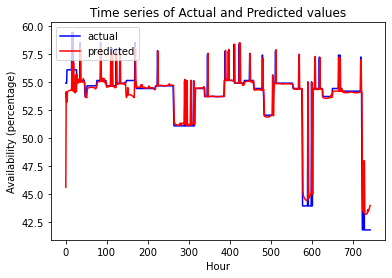




Preparing training data for carpark  ['AR7L']
	Collating data for  2019  year and  10  month.
	Collating data for  2021  year and  10  month.
	Collating data for  2022  year and  8  month.
	Collating data for  2022  year and  9  month.
Preparing test data
Getting arrays for training
Fitting the model
Fitting 3 folds for each of 16 candidates, totalling 48 fits
	 SVR(C=10, gamma=0.001)
Getting arrays for testing

Testing Results: 
R-squared: 0.6428218634315396
Mean Squared Error (Train): 405.20324762790966
Mean Squared Error (Test): 441.58419582007065


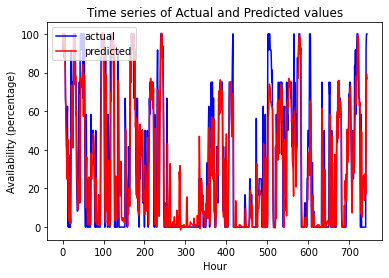




Preparing training data for carpark  ['AR7M']
	Collating data for  2019  year and  10  month.
	Collating data for  2021  year and  10  month.
	Collating data for  2022  year and  8  month.
	Collating data for  2022  year and  9  month.
Preparing test data
Getting arrays for training
Fitting the model
Fitting 3 folds for each of 16 candidates, totalling 48 fits
	 SVR(C=10, gamma=0.001)
Getting arrays for testing

Testing Results: 
R-squared: 0.9418341650767119
Mean Squared Error (Train): 8.06925351471398
Mean Squared Error (Test): 6.126161044379933


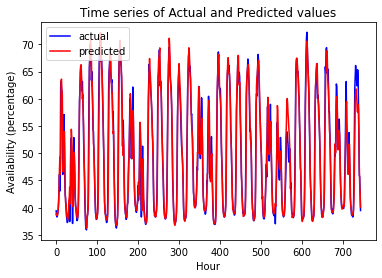




Preparing training data for carpark  ['AV1']
	Collating data for  2019  year and  10  month.
	Collating data for  2021  year and  10  month.
	Collating data for  2022  year and  8  month.
	Collating data for  2022  year and  9  month.
Preparing test data
Getting arrays for training
Fitting the model
Fitting 3 folds for each of 16 candidates, totalling 48 fits
	 SVR(C=10, gamma=0.001)
Getting arrays for testing

Testing Results: 
R-squared: 0.887506924124591
Mean Squared Error (Train): 44.14982629934623
Mean Squared Error (Test): 96.18781906829108


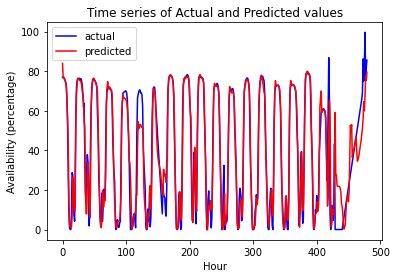




Preparing training data for carpark  ['BM1']
	Collating data for  2019  year and  10  month.
	Collating data for  2021  year and  10  month.
	Collating data for  2022  year and  8  month.
	Collating data for  2022  year and  9  month.
Preparing test data
Getting arrays for training
Fitting the model
Fitting 3 folds for each of 16 candidates, totalling 48 fits
	 SVR(C=10, gamma=0.001)
Getting arrays for testing

Testing Results: 
R-squared: 0.6472184497186946
Mean Squared Error (Train): 53.7349369361322
Mean Squared Error (Test): 56.335933948261435


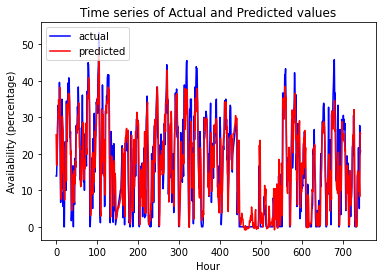




Preparing training data for carpark  ['BM10']
	Collating data for  2019  year and  10  month.
	Collating data for  2021  year and  10  month.
	Collating data for  2022  year and  8  month.
	Collating data for  2022  year and  9  month.
Preparing test data
Getting arrays for training
Fitting the model
Fitting 3 folds for each of 16 candidates, totalling 48 fits
	 SVR(C=10, gamma=0.001)
Getting arrays for testing

Testing Results: 
R-squared: 0.9237254199834566
Mean Squared Error (Train): 1.65887438504643
Mean Squared Error (Test): 0.2505280415699093


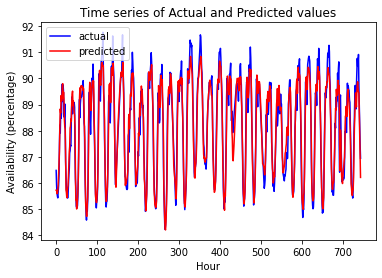




Preparing training data for carpark  ['BM13']
	Collating data for  2019  year and  10  month.
	Collating data for  2021  year and  10  month.
	Collating data for  2022  year and  8  month.
	Collating data for  2022  year and  9  month.
Preparing test data
Getting arrays for training
Fitting the model
Fitting 3 folds for each of 16 candidates, totalling 48 fits
	 SVR(C=10, gamma=0.001)
Getting arrays for testing

Testing Results: 
R-squared: 0.7819064857143565
Mean Squared Error (Train): 12.67310012700282
Mean Squared Error (Test): 13.594772907257058


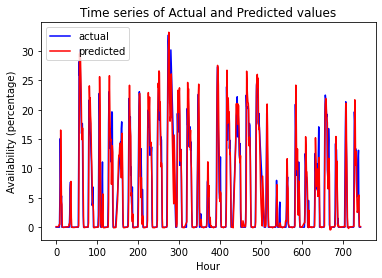




Preparing training data for carpark  ['BM14']
	Collating data for  2019  year and  10  month.
	Collating data for  2021  year and  10  month.
	Collating data for  2022  year and  8  month.
	Collating data for  2022  year and  9  month.
Preparing test data
Getting arrays for training
Fitting the model
Fitting 3 folds for each of 16 candidates, totalling 48 fits
	 SVR(C=10, gamma=0.001)
Getting arrays for testing

Testing Results: 
R-squared: 0.9422959271678963
Mean Squared Error (Train): 8.714056657895028
Mean Squared Error (Test): 0.5828050257991818


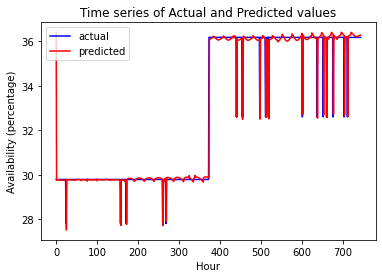




Preparing training data for carpark  ['BM19']
	Collating data for  2019  year and  10  month.
	Collating data for  2021  year and  10  month.
	Collating data for  2022  year and  8  month.
	Collating data for  2022  year and  9  month.
Preparing test data
Getting arrays for training
Fitting the model
Fitting 3 folds for each of 16 candidates, totalling 48 fits
	 SVR(C=10, gamma=0.001)
Getting arrays for testing

Testing Results: 
R-squared: 0.638398048062384
Mean Squared Error (Train): 21.656275430230895
Mean Squared Error (Test): 1.8611448449666927


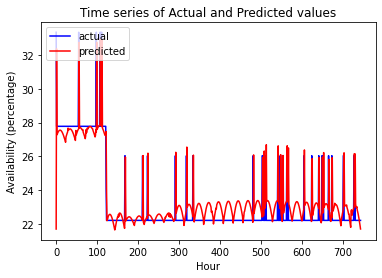




Preparing training data for carpark  ['BM2']
	Collating data for  2019  year and  10  month.
	Collating data for  2021  year and  10  month.
	Collating data for  2022  year and  8  month.
	Collating data for  2022  year and  9  month.
Preparing test data
Getting arrays for training
Fitting the model
Fitting 3 folds for each of 16 candidates, totalling 48 fits
	 SVR(C=10, gamma=0.001)
Getting arrays for testing

Testing Results: 
R-squared: 0.8001364678713059
Mean Squared Error (Train): 48.23215886202121
Mean Squared Error (Test): 48.54516924532124


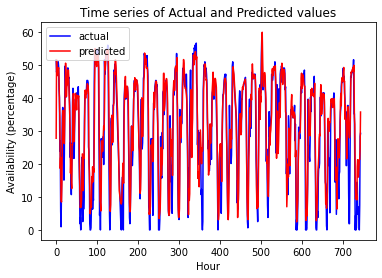

In [198]:
# Wamika
for i in range(0, 10):    
    carpark = train_data_groups[i:i+1]
    print('Preparing training data for carpark ', carpark)
    train_data_1 = train_data[train_data['carpark_number'].isin(carpark)]
    data = pd.DataFrame(columns = ['day', 'hour', 'percent_lots_available'])
    train_data_all = pd.DataFrame()
    
    train_data_yearly = train_data_1.groupby("year", as_index = False)
    
    for year in train_data_yearly.groups.keys():
#         if year == 2019 or year == 2021:
#             continue
        train_data_monthly = train_data_yearly.get_group(year).groupby("month", as_index = False)

        for month in train_data_monthly.groups.keys(): 
#             if month == 8:
#                 continue
            print('\tCollating data for ', year, ' year and ', month, ' month.')
            train_data_daily = train_data_monthly.get_group(month).groupby("day", as_index = False)
            
            train_data_1_agg = pd.DataFrame()
            
            for day in train_data_daily.groups.keys():
                day_data = train_data_daily.get_group(day)
                hourly_data_day = day_data.groupby('hour', as_index = False)['percent_lots_available'].mean()
#                 title = "Day: " + str(day)
#                 hourly_data_day.plot(title = title, y = "percent_lots_available", xlabel = 'hour', \
#                          ylabel = 'Lots available (percentage)', xticks = hourly_data_day["hour"])
                hourly_data = []
                hour = []
                for i in range(0, 24):
                    hour.append(i)
                    value = np.NaN if hourly_data_day[hourly_data_day['hour'] == i]['percent_lots_available'].empty \
                    else hourly_data_day[hourly_data_day['hour'] == i]['percent_lots_available'].iloc[0]
                    hourly_data.append(value)

                data['hour'] = hour
                data['percent_lots_available'] = hourly_data
                data['day'] = day
                train_data_1_agg = train_data_1_agg.append(data, ignore_index=True)

#             print(train_data_1_agg)
            train_data_1_agg.interpolate(method='linear', limit_direction='both', inplace = True)
#             print(train_data_1_agg)

            train_data_1_agg['lag_1'] = train_data_1_agg['percent_lots_available'].shift(1)
            train_data_1_agg['lag_168'] = train_data_1_agg['percent_lots_available'].shift(168)
#             print(train_data_1_agg.tail(1)['percent_lots_available'])
            train_data_1_agg['lag_1'].iloc[0] = train_data_1_agg.tail(1)['percent_lots_available']
            train_data_1_agg['lag_168'].iloc[:168] = train_data_1_agg.tail(168)['percent_lots_available']
#             print(train_data_1_agg)

        train_data_all = train_data_all.append(train_data_1_agg)
    
    print('Preparing test data')
    test_data_1 = test_data[test_data['carpark_number'].isin(carpark)]
    data = pd.DataFrame(columns = ['day', 'hour', 'percent_lots_available'])
    test_data_agg = pd.DataFrame()

    test_data_daily = test_data_1.groupby("day", as_index = False)
    hours = []
    for day in range(1, len(test_data_daily.groups.keys()) + 1):
        for hour in range(0, 24):
            hours.append(24*(day-1) + hour)

    for day in test_data_daily.groups.keys():
        day_data = test_data_daily.get_group(day)
        hourly_data_day = day_data.groupby('hour', as_index = False)['percent_lots_available'].mean()
#         title = "Day: " + str(day)
#         hourly_data_day.plot(title = title, y = "percent_lots_available", xlabel = 'hour', \
#                  ylabel = 'Lots available (percentage)', xticks = hourly_data_day["hour"])
        hourly_data = []
        hour = []
        for i in range(0, 24):
            hour.append(i)
            value = np.NaN if hourly_data_day[hourly_data_day['hour'] == i]['percent_lots_available'].empty \
            else hourly_data_day[hourly_data_day['hour'] == i]['percent_lots_available'].iloc[0]
            hourly_data.append(value)

        data['hour'] = hour
        data['percent_lots_available'] = hourly_data
        data['day'] = day
        test_data_agg = test_data_agg.append(data, ignore_index=True)

    test_data_agg.interpolate(method='linear', limit_direction='both', inplace = True)
    #             print(train_data_1_agg)

    test_data_agg['lag_1'] = test_data_agg['percent_lots_available'].shift(1)
    test_data_agg['lag_168'] = test_data_agg['percent_lots_available'].shift(168)

#     print(test_data_agg.tail(168))
    test_data_agg['lag_1'].iloc[0] = test_data_agg.tail(1)['percent_lots_available']
    test_data_agg['lag_168'].iloc[:168] = test_data_agg.tail(168)['percent_lots_available']
#     print(test_data_agg)
    
    print("Getting arrays for training")
    X_train = train_data_all[['day', 'hour', 'lag_1', 'lag_168']]
    y_train = train_data_all[['percent_lots_available']]
#     print(X_train)
    X_train_arr = np.asarray(X_train).reshape(-1, 4)
    y_train_arr = np.asarray(y_train).reshape(-1, 1)
        
    print('Fitting the model')  
    
    ## Got the C and gamma values by hyperparameter tuning usin gridsearch cv for 1 sample carpark data
    param_grid = {'C': [0.01, 0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01, 0.001]} 
    grid_svr = GridSearchCV(SVR(), param_grid, refit = True, verbose = 1, cv = 3)
    # fitting the model for grid search
    grid_svr.fit(X_train_arr, y_train_arr)
    # print how our model looks after hyper-parameter tuning
    print("\t", grid_svr.best_estimator_)
    
    regressor = SVR(C = grid_svr.best_params_['C'], gamma = grid_svr.best_params_['gamma'])
    regressor.fit(X_train_arr, y_train_arr)
    
    print("Getting arrays for testing")
    X_test = test_data_agg[['day', 'hour', 'lag_1', 'lag_168']]
    y_test = test_data_agg[['percent_lots_available']]
    X_test_arr = np.asarray(X_test).reshape(-1, 4)
    y_test_arr = np.asarray(y_test).reshape(-1, 1)
    
    print('\nTesting Results: ')
    predicted = regressor.predict(X_test_arr)
    score = regressor.score(X_test_arr,y_test_arr)
    train_MSE = metrics.mean_squared_error(y_train_arr, regressor.predict(X_train_arr))
    test_MSE = metrics.mean_squared_error(y_test_arr, predicted)
    print("R-squared:", score)
    print('Mean Squared Error (Train):', train_MSE)
    print('Mean Squared Error (Test):', test_MSE)
    
    # Plotting the time series
    plt.plot(hours, y_test_arr, "-b", label = "actual")
    plt.plot(hours, predicted, "-r", label = "predicted")

    plt.title('Time series of Actual and Predicted values')
    plt.legend(loc="upper left")

    plt.xlabel('Hour')
    plt.ylabel('Availability (percentage)')

    plt.show()
    
    name = "model_" + carpark[0] + ".sav"
    pickle.dump(regressor, open(name, 'wb'))
    
    print("\n\n")
    
# all_models

In [ ]:
# Pranati
for i in range(44, 88):    
    carpark = train_data_groups[i:i+1]
    print('Preparing training data for carpark ', carpark)
    train_data_1 = train_data[train_data['carpark_number'].isin(carpark)]
    data = pd.DataFrame(columns = ['day', 'hour', 'percent_lots_available'])
    train_data_all = pd.DataFrame()
    
    train_data_yearly = train_data_1.groupby("year", as_index = False)
    
    for year in train_data_yearly.groups.keys():
#         if year == 2019 or year == 2021:
#             continue
        train_data_monthly = train_data_yearly.get_group(year).groupby("month", as_index = False)

        for month in train_data_monthly.groups.keys(): 
#             if month == 8:
#                 continue
            print('\tCollating data for ', year, ' year and ', month, ' month.')
            train_data_daily = train_data_monthly.get_group(month).groupby("day", as_index = False)
            
            train_data_1_agg = pd.DataFrame(columns = ['day', 'hour', 'percent_lots_available'])
            
            for day in train_data_daily.groups.keys():
                day_data = train_data_daily.get_group(day)
                hourly_data_day = day_data.groupby('hour', as_index = False)['percent_lots_available'].mean()
#                 title = "Day: " + str(day)
#                 hourly_data_day.plot(title = title, y = "percent_lots_available", xlabel = 'hour', \
#                          ylabel = 'Lots available (percentage)', xticks = hourly_data_day["hour"])
                hourly_data = []
                hour = []
                for i in range(0, 24):
                    hour.append(i)
                    value = np.NaN if hourly_data_day[hourly_data_day['hour'] == i]['percent_lots_available'].empty \
                    else hourly_data_day[hourly_data_day['hour'] == i]['percent_lots_available'].iloc[0]
                    hourly_data.append(value)

                data['hour'] = hour
                data['percent_lots_available'] = hourly_data
                data['day'] = day
                train_data_1_agg = train_data_1_agg.append(data, ignore_index=True)

            train_data_1_agg.interpolate(method='linear', inplace = True)
#             print(train_data_1_agg)

            train_data_1_agg['lag_1'] = train_data_1_agg['percent_lots_available'].shift(1)
            train_data_1_agg['lag_168'] = train_data_1_agg['percent_lots_available'].shift(168)
            train_data_1_agg.iloc[0:1]['lag_1'] = train_data_1_agg.iloc[:-1]['percent_lots_available']
            train_data_1_agg.iloc[0:168]['lag_168'] = train_data_1_agg.iloc[:-168]['percent_lots_available']
#             print(train_data_1_agg)

        train_data_all = train_data_all.append(train_data_1_agg)
    
    print('Preparing test data')
    test_data_1 = test_data[test_data['carpark_number'].isin(carpark)]
    data = pd.DataFrame(columns = ['day', 'hour', 'percent_lots_available'])
    test_data_agg = pd.DataFrame(columns = ['day', 'hour', 'percent_lots_available'])

    test_data_daily = test_data_1.groupby("day", as_index = False)

    for day in test_data_daily.groups.keys():
        day_data = test_data_daily.get_group(day)
        hourly_data_day = day_data.groupby('hour', as_index = False)['percent_lots_available'].mean()
#         title = "Day: " + str(day)
#         hourly_data_day.plot(title = title, y = "percent_lots_available", xlabel = 'hour', \
#                  ylabel = 'Lots available (percentage)', xticks = hourly_data_day["hour"])
        hourly_data = []
        hour = []
        for i in range(0, 24):
            hour.append(i)
            value = np.NaN if hourly_data_day[hourly_data_day['hour'] == i]['percent_lots_available'].empty \
            else hourly_data_day[hourly_data_day['hour'] == i]['percent_lots_available'].iloc[0]
            hourly_data.append(value)

        data['hour'] = hour
        data['percent_lots_available'] = hourly_data
        data['day'] = day
        test_data_agg = test_data_agg.append(data, ignore_index=True)

    test_data_agg.interpolate(method='linear', inplace = True)
    #             print(train_data_1_agg)

    test_data_agg['lag_1'] = test_data_agg['percent_lots_available'].shift(1)
    test_data_agg['lag_168'] = test_data_agg['percent_lots_available'].shift(168)
    test_data_agg.iloc[0:1]['lag_1'] = test_data_agg.iloc[:-1]['percent_lots_available']
    test_data_agg.iloc[0:168]['lag_168'] = test_data_agg.iloc[:-168]['percent_lots_available']
    
    print("Getting arrays for training")
    X_train = train_data_all[['day', 'hour', 'lag_1', 'lag_168']]
    y_train = train_data_all[['percent_lots_available']]
    X_train_arr = np.asarray(X_train).reshape(-1, 4)
    y_train_arr = np.asarray(y_train).reshape(-1, 1)
        
    print('Fitting the model')  
    
    ## Got the C and gamma values by hyperparameter tuning usin gridsearch cv for 1 sample carpark data
    param_grid = {'C': [0.01, 0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01, 0.001]} 
    grid_svr = GridSearchCV(SVR(), param_grid, refit = True, verbose = 1, cv = 3)
    # fitting the model for grid search
    grid_svr.fit(X_train_arr, y_train_arr)
    # print how our model looks after hyper-parameter tuning
    print("\t", grid_svr.best_estimator_)
    
    regressor = SVR(C = grid_svr.best_params_['C'], gamma = grid_svr.best_params_['gamma'])
    regressor.fit(X_train_arr, y_train_arr)
    
    print("Getting arrays for testing")
    X_test = test_data_agg[['day', 'hour', 'lag_1', 'lag_168']]
    y_test = test_data_agg[['percent_lots_available']]
    X_test_arr = np.asarray(X_test).reshape(-1, 4)
    y_test_arr = np.asarray(y_test).reshape(-1, 1)
    
    print('\nTesting Results: ')
    predicted = regressor.predict(X_test_arr)
    score = regressor.score(X_test_arr,y_test_arr)
    train_MSE = metrics.mean_squared_error(y_train_arr, regressor.predict(X_train_arr))
    test_MSE = metrics.mean_squared_error(y_test_arr, predicted)
    print("R-squared:", score)
    print('Mean Squared Error (Train):', train_MSE)
    print('Mean Squared Error (Test):', test_MSE)
    
    # Plotting the time series
    plt.plot(hours, y_test_arr, "-b", label = "actual")
    plt.plot(hours, predicted, "-r", label = "predicted")

    plt.title('Time series of Actual and Predicted values')
    plt.legend(loc="upper left")

    plt.xlabel('Hour')
    plt.ylabel('Availability (percentage)')

    plt.show()
    
    name = "model_" + carpark[0] + ".sav"
    pickle.dump(regressor, open(name, 'wb'))
    
    print("\n\n")
    
# all_models

In [ ]:
# Gayathri
for i in range(88, 132):    
    carpark = train_data_groups[i:i+1]
    print('Preparing training data for carpark ', carpark)
    train_data_1 = train_data[train_data['carpark_number'].isin(carpark)]
    data = pd.DataFrame(columns = ['day', 'hour', 'percent_lots_available'])
    train_data_all = pd.DataFrame()
    
    train_data_yearly = train_data_1.groupby("year", as_index = False)
    
    for year in train_data_yearly.groups.keys():
#         if year == 2019 or year == 2021:
#             continue
        train_data_monthly = train_data_yearly.get_group(year).groupby("month", as_index = False)

        for month in train_data_monthly.groups.keys(): 
#             if month == 8:
#                 continue
            print('\tCollating data for ', year, ' year and ', month, ' month.')
            train_data_daily = train_data_monthly.get_group(month).groupby("day", as_index = False)
            
            train_data_1_agg = pd.DataFrame(columns = ['day', 'hour', 'percent_lots_available'])
            
            for day in train_data_daily.groups.keys():
                day_data = train_data_daily.get_group(day)
                hourly_data_day = day_data.groupby('hour', as_index = False)['percent_lots_available'].mean()
#                 title = "Day: " + str(day)
#                 hourly_data_day.plot(title = title, y = "percent_lots_available", xlabel = 'hour', \
#                          ylabel = 'Lots available (percentage)', xticks = hourly_data_day["hour"])
                hourly_data = []
                hour = []
                for i in range(0, 24):
                    hour.append(i)
                    value = np.NaN if hourly_data_day[hourly_data_day['hour'] == i]['percent_lots_available'].empty \
                    else hourly_data_day[hourly_data_day['hour'] == i]['percent_lots_available'].iloc[0]
                    hourly_data.append(value)

                data['hour'] = hour
                data['percent_lots_available'] = hourly_data
                data['day'] = day
                train_data_1_agg = train_data_1_agg.append(data, ignore_index=True)

            train_data_1_agg.interpolate(method='linear', inplace = True)
#             print(train_data_1_agg)

            train_data_1_agg['lag_1'] = train_data_1_agg['percent_lots_available'].shift(1)
            train_data_1_agg['lag_168'] = train_data_1_agg['percent_lots_available'].shift(168)
            train_data_1_agg.iloc[0:1]['lag_1'] = train_data_1_agg.iloc[:-1]['percent_lots_available']
            train_data_1_agg.iloc[0:168]['lag_168'] = train_data_1_agg.iloc[:-168]['percent_lots_available']
#             print(train_data_1_agg)

        train_data_all = train_data_all.append(train_data_1_agg)
    
    print('Preparing test data')
    test_data_1 = test_data[test_data['carpark_number'].isin(carpark)]
    data = pd.DataFrame(columns = ['day', 'hour', 'percent_lots_available'])
    test_data_agg = pd.DataFrame(columns = ['day', 'hour', 'percent_lots_available'])

    test_data_daily = test_data_1.groupby("day", as_index = False)

    for day in test_data_daily.groups.keys():
        day_data = test_data_daily.get_group(day)
        hourly_data_day = day_data.groupby('hour', as_index = False)['percent_lots_available'].mean()
#         title = "Day: " + str(day)
#         hourly_data_day.plot(title = title, y = "percent_lots_available", xlabel = 'hour', \
#                  ylabel = 'Lots available (percentage)', xticks = hourly_data_day["hour"])
        hourly_data = []
        hour = []
        for i in range(0, 24):
            hour.append(i)
            value = np.NaN if hourly_data_day[hourly_data_day['hour'] == i]['percent_lots_available'].empty \
            else hourly_data_day[hourly_data_day['hour'] == i]['percent_lots_available'].iloc[0]
            hourly_data.append(value)

        data['hour'] = hour
        data['percent_lots_available'] = hourly_data
        data['day'] = day
        test_data_agg = test_data_agg.append(data, ignore_index=True)

    test_data_agg.interpolate(method='linear', inplace = True)
    #             print(train_data_1_agg)

    test_data_agg['lag_1'] = test_data_agg['percent_lots_available'].shift(1)
    test_data_agg['lag_168'] = test_data_agg['percent_lots_available'].shift(168)
    test_data_agg.iloc[0:1]['lag_1'] = test_data_agg.iloc[:-1]['percent_lots_available']
    test_data_agg.iloc[0:168]['lag_168'] = test_data_agg.iloc[:-168]['percent_lots_available']
    
    print("Getting arrays for training")
    X_train = train_data_all[['day', 'hour', 'lag_1', 'lag_168']]
    y_train = train_data_all[['percent_lots_available']]
    X_train_arr = np.asarray(X_train).reshape(-1, 4)
    y_train_arr = np.asarray(y_train).reshape(-1, 1)
        
    print('Fitting the model')  
    
    ## Got the C and gamma values by hyperparameter tuning usin gridsearch cv for 1 sample carpark data
    param_grid = {'C': [0.01, 0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01, 0.001]} 
    grid_svr = GridSearchCV(SVR(), param_grid, refit = True, verbose = 1, cv = 3)
    # fitting the model for grid search
    grid_svr.fit(X_train_arr, y_train_arr)
    # print how our model looks after hyper-parameter tuning
    print("\t", grid_svr.best_estimator_)
    
    regressor = SVR(C = grid_svr.best_params_['C'], gamma = grid_svr.best_params_['gamma'])
    regressor.fit(X_train_arr, y_train_arr)
    
    print("Getting arrays for testing")
    X_test = test_data_agg[['day', 'hour', 'lag_1', 'lag_168']]
    y_test = test_data_agg[['percent_lots_available']]
    X_test_arr = np.asarray(X_test).reshape(-1, 4)
    y_test_arr = np.asarray(y_test).reshape(-1, 1)
    
    print('\nTesting Results: ')
    predicted = regressor.predict(X_test_arr)
    score = regressor.score(X_test_arr,y_test_arr)
    train_MSE = metrics.mean_squared_error(y_train_arr, regressor.predict(X_train_arr))
    test_MSE = metrics.mean_squared_error(y_test_arr, predicted)
    print("R-squared:", score)
    print('Mean Squared Error (Train):', train_MSE)
    print('Mean Squared Error (Test):', test_MSE)
    
    # Plotting the time series
    plt.plot(hours, y_test_arr, "-b", label = "actual")
    plt.plot(hours, predicted, "-r", label = "predicted")

    plt.title('Time series of Actual and Predicted values')
    plt.legend(loc="upper left")

    plt.xlabel('Hour')
    plt.ylabel('Availability (percentage)')

    plt.show()
    
    name = "model_" + carpark[0] + ".sav"
    pickle.dump(regressor, open(name, 'wb'))
    
    print("\n\n")
    
# all_models

In [ ]:
# Ramana
for i in range(132, 176):    
    carpark = train_data_groups[i:i+1]
    print('Preparing training data for carpark ', carpark)
    train_data_1 = train_data[train_data['carpark_number'].isin(carpark)]
    data = pd.DataFrame(columns = ['day', 'hour', 'percent_lots_available'])
    train_data_all = pd.DataFrame()
    
    train_data_yearly = train_data_1.groupby("year", as_index = False)
    
    for year in train_data_yearly.groups.keys():
#         if year == 2019 or year == 2021:
#             continue
        train_data_monthly = train_data_yearly.get_group(year).groupby("month", as_index = False)

        for month in train_data_monthly.groups.keys(): 
#             if month == 8:
#                 continue
            print('\tCollating data for ', year, ' year and ', month, ' month.')
            train_data_daily = train_data_monthly.get_group(month).groupby("day", as_index = False)
            
            train_data_1_agg = pd.DataFrame(columns = ['day', 'hour', 'percent_lots_available'])
            
            for day in train_data_daily.groups.keys():
                day_data = train_data_daily.get_group(day)
                hourly_data_day = day_data.groupby('hour', as_index = False)['percent_lots_available'].mean()
#                 title = "Day: " + str(day)
#                 hourly_data_day.plot(title = title, y = "percent_lots_available", xlabel = 'hour', \
#                          ylabel = 'Lots available (percentage)', xticks = hourly_data_day["hour"])
                hourly_data = []
                hour = []
                for i in range(0, 24):
                    hour.append(i)
                    value = np.NaN if hourly_data_day[hourly_data_day['hour'] == i]['percent_lots_available'].empty \
                    else hourly_data_day[hourly_data_day['hour'] == i]['percent_lots_available'].iloc[0]
                    hourly_data.append(value)

                data['hour'] = hour
                data['percent_lots_available'] = hourly_data
                data['day'] = day
                train_data_1_agg = train_data_1_agg.append(data, ignore_index=True)

            train_data_1_agg.interpolate(method='linear', inplace = True)
#             print(train_data_1_agg)

            train_data_1_agg['lag_1'] = train_data_1_agg['percent_lots_available'].shift(1)
            train_data_1_agg['lag_168'] = train_data_1_agg['percent_lots_available'].shift(168)
            train_data_1_agg.iloc[0:1]['lag_1'] = train_data_1_agg.iloc[:-1]['percent_lots_available']
            train_data_1_agg.iloc[0:168]['lag_168'] = train_data_1_agg.iloc[:-168]['percent_lots_available']
#             print(train_data_1_agg)

        train_data_all = train_data_all.append(train_data_1_agg)
    
    print('Preparing test data')
    test_data_1 = test_data[test_data['carpark_number'].isin(carpark)]
    data = pd.DataFrame(columns = ['day', 'hour', 'percent_lots_available'])
    test_data_agg = pd.DataFrame(columns = ['day', 'hour', 'percent_lots_available'])

    test_data_daily = test_data_1.groupby("day", as_index = False)

    for day in test_data_daily.groups.keys():
        day_data = test_data_daily.get_group(day)
        hourly_data_day = day_data.groupby('hour', as_index = False)['percent_lots_available'].mean()
#         title = "Day: " + str(day)
#         hourly_data_day.plot(title = title, y = "percent_lots_available", xlabel = 'hour', \
#                  ylabel = 'Lots available (percentage)', xticks = hourly_data_day["hour"])
        hourly_data = []
        hour = []
        for i in range(0, 24):
            hour.append(i)
            value = np.NaN if hourly_data_day[hourly_data_day['hour'] == i]['percent_lots_available'].empty \
            else hourly_data_day[hourly_data_day['hour'] == i]['percent_lots_available'].iloc[0]
            hourly_data.append(value)

        data['hour'] = hour
        data['percent_lots_available'] = hourly_data
        data['day'] = day
        test_data_agg = test_data_agg.append(data, ignore_index=True)

    test_data_agg.interpolate(method='linear', inplace = True)
    #             print(train_data_1_agg)

    test_data_agg['lag_1'] = test_data_agg['percent_lots_available'].shift(1)
    test_data_agg['lag_168'] = test_data_agg['percent_lots_available'].shift(168)
    test_data_agg.iloc[0:1]['lag_1'] = test_data_agg.iloc[:-1]['percent_lots_available']
    test_data_agg.iloc[0:168]['lag_168'] = test_data_agg.iloc[:-168]['percent_lots_available']
    
    print("Getting arrays for training")
    X_train = train_data_all[['day', 'hour', 'lag_1', 'lag_168']]
    y_train = train_data_all[['percent_lots_available']]
    X_train_arr = np.asarray(X_train).reshape(-1, 4)
    y_train_arr = np.asarray(y_train).reshape(-1, 1)
        
    print('Fitting the model')  
    
    ## Got the C and gamma values by hyperparameter tuning usin gridsearch cv for 1 sample carpark data
    param_grid = {'C': [0.01, 0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01, 0.001]} 
    grid_svr = GridSearchCV(SVR(), param_grid, refit = True, verbose = 1, cv = 3)
    # fitting the model for grid search
    grid_svr.fit(X_train_arr, y_train_arr)
    # print how our model looks after hyper-parameter tuning
    print("\t", grid_svr.best_estimator_)
    
    regressor = SVR(C = grid_svr.best_params_['C'], gamma = grid_svr.best_params_['gamma'])
    regressor.fit(X_train_arr, y_train_arr)
    
    print("Getting arrays for testing")
    X_test = test_data_agg[['day', 'hour', 'lag_1', 'lag_168']]
    y_test = test_data_agg[['percent_lots_available']]
    X_test_arr = np.asarray(X_test).reshape(-1, 4)
    y_test_arr = np.asarray(y_test).reshape(-1, 1)
    
    print('\nTesting Results: ')
    predicted = regressor.predict(X_test_arr)
    score = regressor.score(X_test_arr,y_test_arr)
    train_MSE = metrics.mean_squared_error(y_train_arr, regressor.predict(X_train_arr))
    test_MSE = metrics.mean_squared_error(y_test_arr, predicted)
    print("R-squared:", score)
    print('Mean Squared Error (Train):', train_MSE)
    print('Mean Squared Error (Test):', test_MSE)
    
    # Plotting the time series
    plt.plot(hours, y_test_arr, "-b", label = "actual")
    plt.plot(hours, predicted, "-r", label = "predicted")

    plt.title('Time series of Actual and Predicted values')
    plt.legend(loc="upper left")

    plt.xlabel('Hour')
    plt.ylabel('Availability (percentage)')

    plt.show()
    
    name = "model_" + carpark[0] + ".sav"
    pickle.dump(regressor, open(name, 'wb'))
    
    print("\n\n")
    
# all_models

*Q3.2 Based on the insights derived from the analysis, suggest a practical action that can be
taken (i.e., an action that can be taken to benefit society. Do not suggest actions such as
hyperparameter tuning here).*

In [ ]:
### Print 1 graph for a randomly chosen carpark with oct 2022 test data